In [6]:
import os
import torch
from torchvision import models, transforms
from PIL import Image
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as skl

## Full images

In [7]:
features = np.load('autoencoder_features_mnist.npy')

#### Visualize features

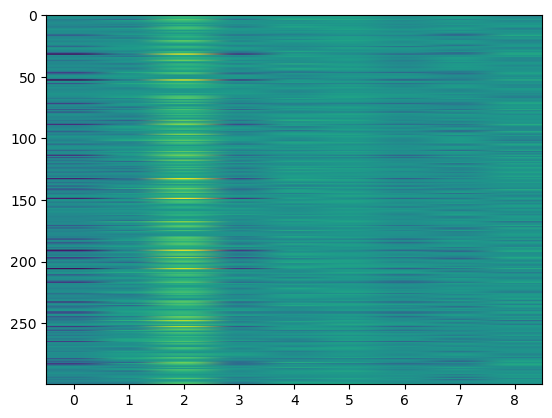

In [8]:
plt.imshow(features,aspect='auto')

#### HDBScan clustering

In [9]:
hdb = skl.cluster.HDBSCAN(min_cluster_size=6)
hdb.fit(features)

,min_cluster_size,6
,min_samples,None
,cluster_selection_epsilon,0.0
,max_cluster_size,None
,metric,'euclidean'
,metric_params,None
,alpha,1.0
,algorithm,'auto'
,leaf_size,40
,n_jobs,None
,cluster_selection_method,'eom'


In [10]:
hdb.labels_

array([ 2,  2,  2,  2, -1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2, -1,
       -1,  2,  2,  2,  2,  2,  2,  2,  2,  1,  2,  2,  2,  2,  3,  0,  2,
        2,  2,  2, -1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  1, -1,  2,  2,
        2,  2,  0,  2,  2,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  1,  2,  2,  2,  2, -1,  2,  1,  2,  2,  2,  2,  2,
        2, -1,  2,  2, -1, -1, -1,  2,  2, -1, -1,  2, -1,  2,  2,  2,  2,
       -1,  2, -1, -1,  2,  2,  2,  2,  3,  2,  2,  2, -1,  2,  1,  2, -1,
        2,  2, -1,  2,  2,  2, -1,  2,  2,  2,  2,  2, -1,  2,  0, -1,  2,
       -1,  2,  2,  1,  2, -1, -1,  2, -1,  2,  2,  2,  2,  0,  2,  2,  2,
        2,  2,  2, -1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2, -1,  2,
        2, -1,  2,  3,  2,  2,  2,  2,  2,  2,  2, -1,  1,  2,  2,  1,  2,
        2,  2, -1,  2,  0, -1, -1,  2,  2,  2, -1, -1,  2,  2,  2,  2,  2,
       -1,  2,  0,  2,  2,  2,  2,  1,  2,  2,  2,  2,  1,  1,  2,  2,  2,
        2,  2,  2,  2,  2

#### tSNE embeddings

In [11]:
X_embedded = skl.manifold.TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=3).fit_transform(features)

In [12]:
X_embedded.shape

(300, 2)

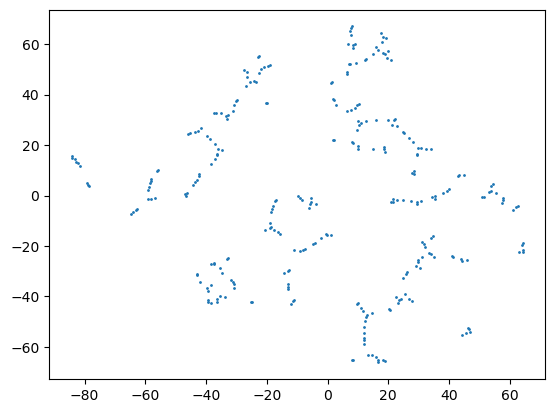

In [13]:
plt.scatter(X_embedded[:,0],X_embedded[:,1],s=1)

### Plot

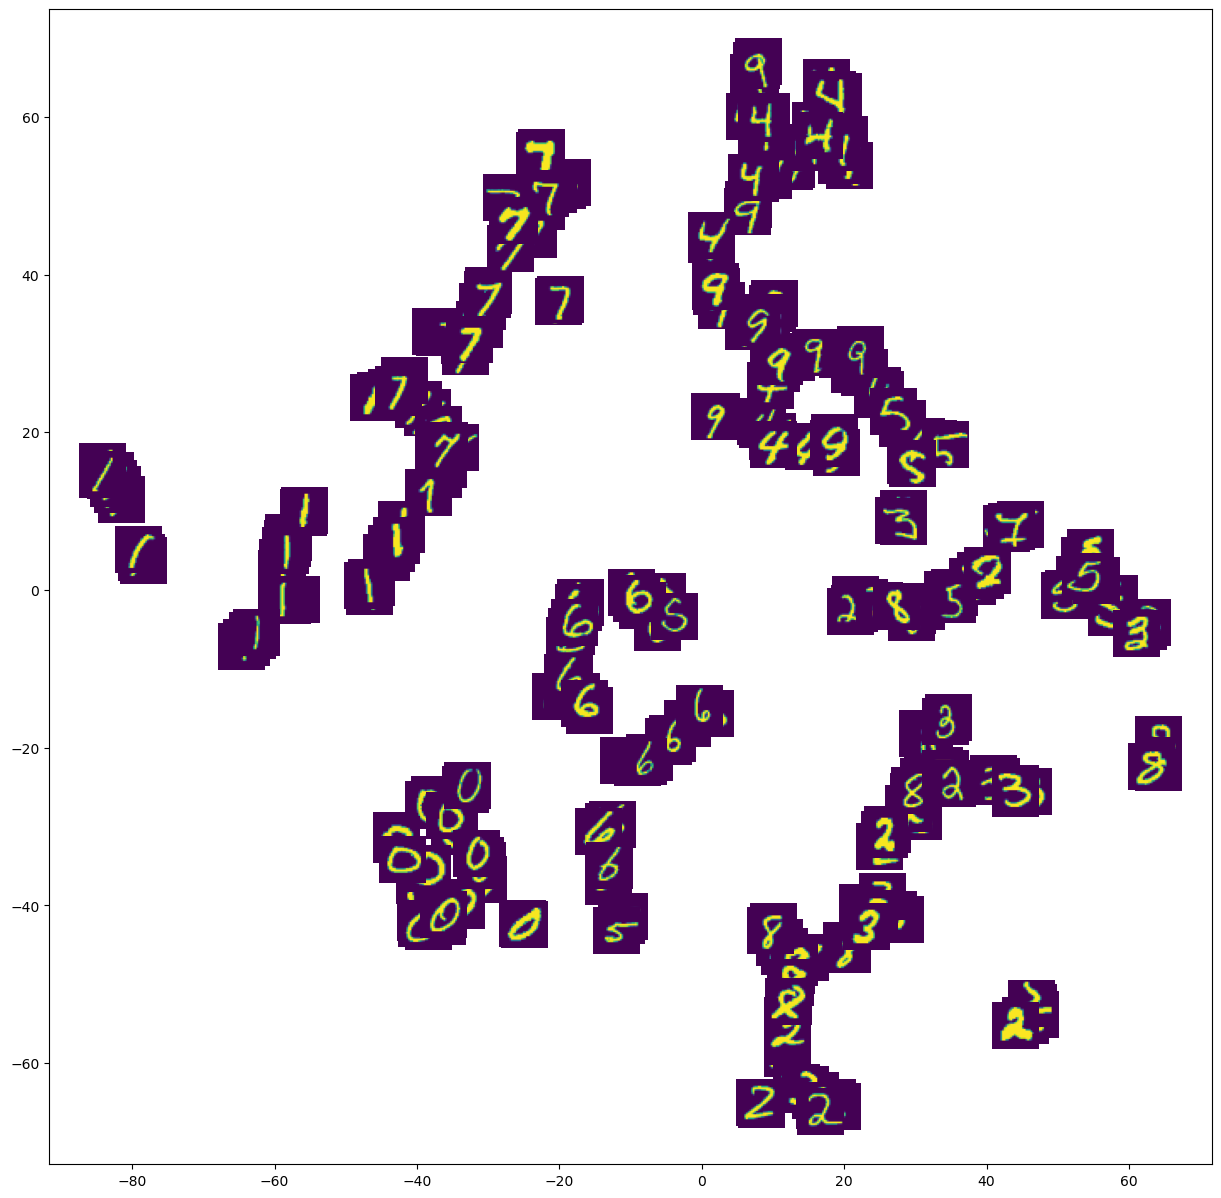

In [22]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.cbook import get_sample_data

images = np.load('autoencoder_images_mnist.npy')

def main():
    x = X_embedded[:,0]
    y = X_embedded[:,1]
    fig, ax = plt.subplots(figsize=(15,15))
    imscatter(x, y, images, zoom=0.1, ax=ax)
    #ax.plot(x, y)
    plt.show()

def imscatter(x, y, images, ax=None, zoom=1):
    if ax is None:
        ax = plt.gca()
    artists = []
    for x0, y0, image in zip(x, y,images):
        im = OffsetImage(image, zoom=1.2)
        ab = AnnotationBbox(im, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    return artists

main()